In [25]:
import pandas as pd 
import numpy as  np 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_excel(r'C:\Users\Lenovo\OneDrive\Desktop\practice\ML-D1-LinearRegression.xlsx')
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [27]:
df.shape

(1338, 7)

In [28]:
df.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [29]:
df.duplicated().sum()

np.int64(1)

In [30]:
df[df.duplicated()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
581,19.0,male,30.59,0,no,northwest,1639.5631


In [31]:
df=df.drop_duplicates()

In [32]:
df.isnull().any()

age                        True
gender                    False
BMI                        True
Children                  False
smoking_status            False
location                  False
health_insurance_price     True
dtype: bool

In [33]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [34]:
df=df.dropna()

In [35]:
df.shape

(1284, 7)

In [36]:
numerical_col=df.select_dtypes(include='number').columns.to_list()
numerical_col


['age', 'BMI', 'Children', 'health_insurance_price']

In [37]:
categorical_col=df.select_dtypes(exclude='number').columns.to_list()
categorical_col


['gender', 'smoking_status', 'location']

In [38]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1284.000000,1284.000000,1284.000000,1284.000000
mean,39.174455,30.618302,1.087227,13185.606206
std,14.095016,6.105360,1.206707,12061.626761
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.180000,0.000000,4719.683425
50%,39.000000,30.300000,1.000000,9333.014350
75%,51.000000,34.520000,2.000000,16452.097988
max,64.000000,53.130000,5.000000,63770.428010


In [39]:
df.describe(include='object')

,gender,smoking_status,location
count,1284,1284,1284
unique,2,2,4
top,male,no,southeast
freq,651,1022,351


In [40]:
for i in categorical_col:
    print(df[i].value_counts())

gender
male      651
female    633
Name: count, dtype: int64
smoking_status
no     1022
yes     262
Name: count, dtype: int64
location
southeast    351
northeast    316
northwest    309
southwest    308
Name: count, dtype: int64


In [41]:
df.groupby(['location','gender'])['health_insurance_price'].mean()

location   gender
northeast  female    13002.117965
           male      13809.306164
northwest  female    12296.505537
           male      12346.484142
southeast  female    13106.712310
           male      15679.856023
southwest  female    11181.111599
           male      13590.071110
Name: health_insurance_price, dtype: float64

In [42]:
df.groupby(['smoking_status'])['health_insurance_price'].mean()

smoking_status
no      8363.178479
yes    31996.755585
Name: health_insurance_price, dtype: float64

In [43]:
df.groupby(['location','gender'])['health_insurance_price'].max()

location   gender
northeast  female    58571.07448
           male      48549.17835
northwest  female    55135.40209
           male      60021.39897
southeast  female    63770.42801
           male      62592.87309
southwest  female    48824.45000
           male      52590.82939
Name: health_insurance_price, dtype: float64

In [44]:
df.groupby(['gender'])['health_insurance_price'].min()

gender
female    1607.5101
male      1121.8739
Name: health_insurance_price, dtype: float64

In [45]:
df[(df['age']>35)&(df['gender']=='female')]['health_insurance_price'].mean()

np.float64(15069.436895482093)

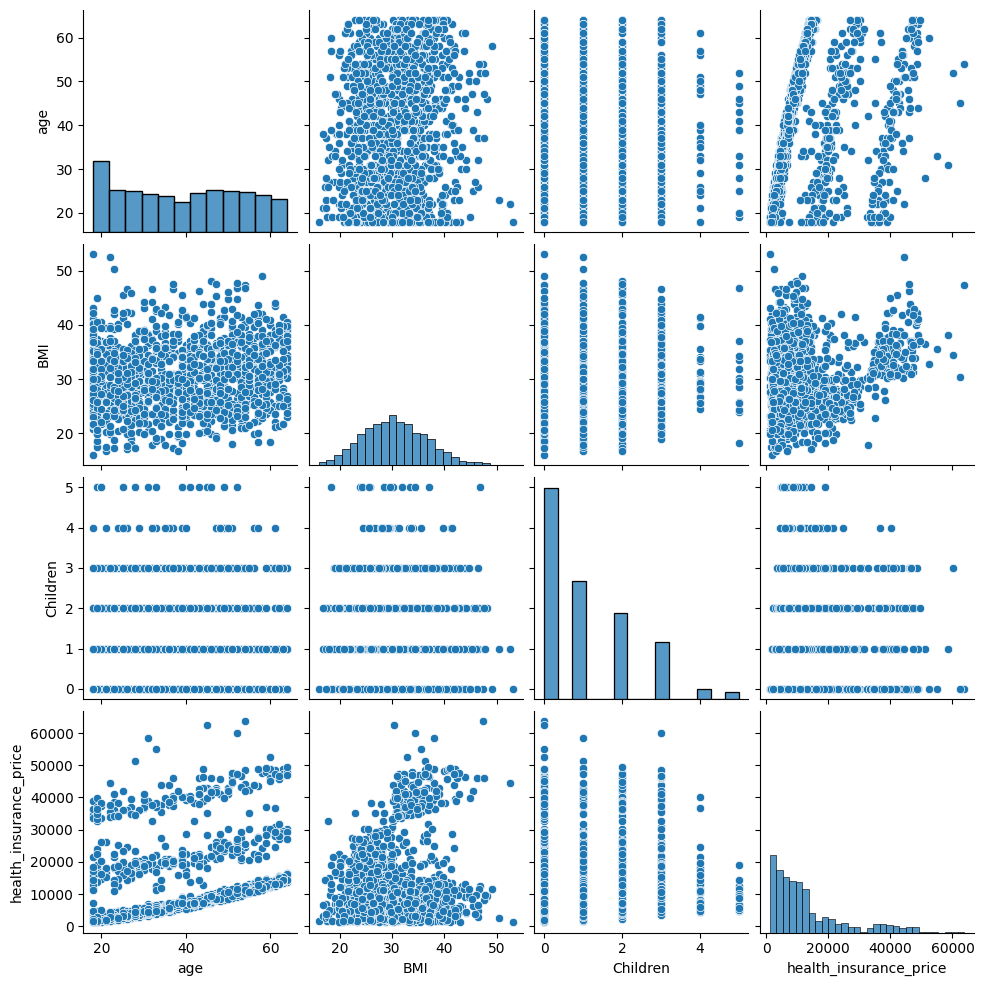

In [46]:
sns.pairplot(df)

<Axes: >

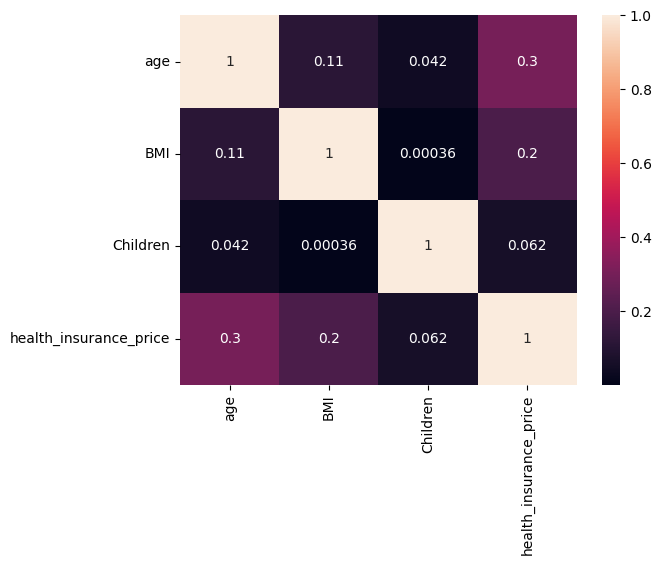

In [47]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='BMI', ylabel='health_insurance_price'>

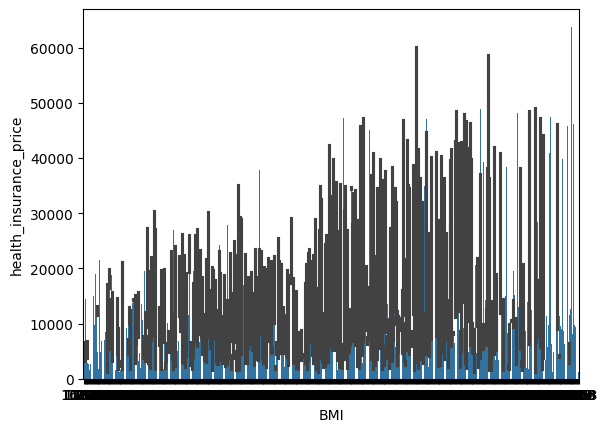

In [48]:
sns.barplot(x=df['BMI'],y=df['health_insurance_price'])

<Axes: xlabel='gender', ylabel='health_insurance_price'>

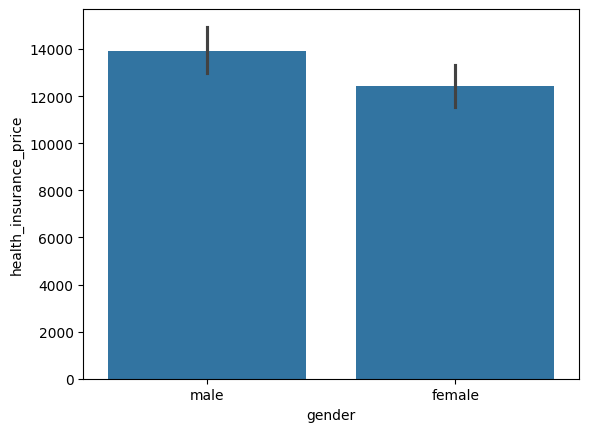

In [49]:
sns.barplot(x=df['gender'],y=df['health_insurance_price'])

<Axes: xlabel='age', ylabel='Count'>

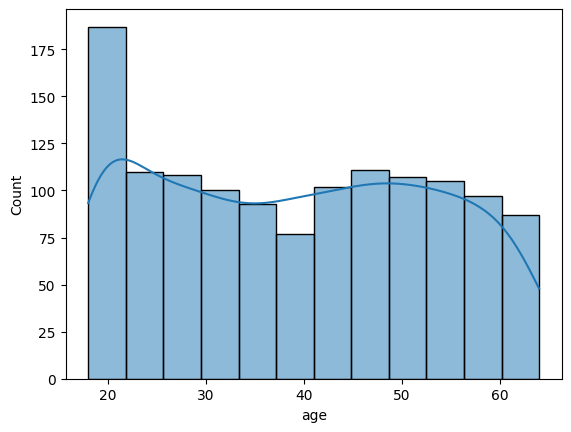

In [50]:
sns.histplot(x=df['age'],kde=True)

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_col:
    df[i]=le.fit_transform(df[i])

In [52]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520
5,31.0,0,25.740,0,0,2,3756.62160


In [53]:
x=df.drop('health_insurance_price',axis=1)
y=df['health_insurance_price']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [55]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
model=LR.fit(x_train,y_train)


In [56]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
model.intercept_


np.float64(-11105.20627831053)

In [58]:
model.coef_

array([  258.23318966,    79.37819943,   303.62774649,   429.04634084,
       23776.37339481,  -360.08036984])

In [59]:
y_pred=model.predict(x_test)

In [60]:
from sklearn.metrics import mean_absolute_error,r2_score
print("the mean absoulter error is :",mean_absolute_error(y_pred,y_test))
print("the root  mean absoulter error is :",np.sqrt(mean_absolute_error(y_pred,y_test)))
print("the r2sores is is :",r2_score(y_pred,y_test))

the mean absoulter error is : 4409.498094856371
the root  mean absoulter error is : 66.40405179547683
the r2sores is is : 0.6236464846088265


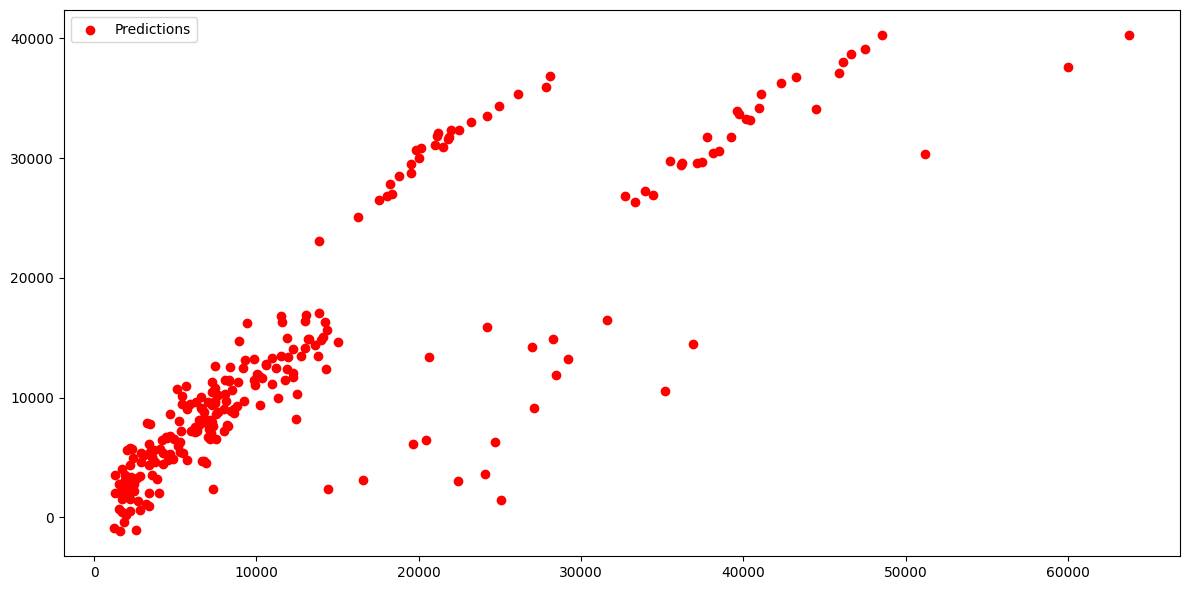

In [61]:
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=y_pred,c='red',label='Predictions')
plt.legend()
plt.tight_layout()
plt.savefig("Test vs Pred")
plt.show()

In [63]:
traning_set=pd.concat([x_train,y_train],axis=1)
testing_set=pd.concat([x_test,y_test],axis=1)

In [64]:
traning_set.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
820,45.0,1,33.70,1,0,3,7445.9180
883,51.0,0,37.05,3,1,0,46255.1125
1131,27.0,1,45.90,2,0,3,3693.4280
1322,62.0,1,38.83,0,0,2,12981.3457
142,34.0,1,25.30,2,1,2,18972.4950


In [66]:
traning_set.to_csv("Traning Set of the Health insurance.csv ")
testing_set.to_csv("Testing Set of the Health insurance.csv ")

